# Model training

#### BTC-USDT for ROR_n24 with price action features


<br>

#### Performance by Model ID

```
model_id: 1a198235336cc9cd417004b752cc80ffdf7b2705
    - n_estimates = 500
    - max_depth = 10

```


```
model_id: 563ca0d5f53de8de73ac097f19d3dc514b0dfb0c
    - n_estimates = 1_000
    - max_depth=10

```

<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [1]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [2]:
# Load model data
data = dataObject("""
with

ticker_data as (
  select
    ticker_time,
    ticker_time_sec,
    ticker,
    `interval` as ticker_interval,
    ROR_n1,
    ROR_n5,
    ROR_n20,
    ROR_n25,
    ROR_n30,
    volume_base,
    volume,
    open as open1,
    high as high1,
    low as low1,
    close as close1,
    rank() over (partition by ticker_time order by etl_time desc) as load_rank,
  from `algom-trading.train_features.features_BTC_USDT_hour_i02_20200101`
  )

select *,
  round(log(safe_divide(close1, open12)), 5) as open_close1,
  round(log(safe_divide(high1, open12)), 5)  as open_high1,
  round(log(safe_divide(low1, open12)), 5)   as open_low1,

  round(log(safe_divide(close2, open12)), 5) as open_close2,
  round(log(safe_divide(high2, open12)), 5)  as open_high2,
  round(log(safe_divide(low2, open12)), 5)   as open_low2,

  round(log(safe_divide(close3, open12)), 5) as open_close3,
  round(log(safe_divide(high3, open12)), 5)  as open_high3,
  round(log(safe_divide(low3, open12)), 5)   as open_low3,

  round(log(safe_divide(close4, open12)), 5) as open_close4,
  round(log(safe_divide(high4, open12)), 5)  as open_high4,
  round(log(safe_divide(low4, open12)), 5)   as open_low4,

  round(log(safe_divide(close5, open12)), 5) as open_close5,
  round(log(safe_divide(high5, open12)), 5)  as open_high5,
  round(log(safe_divide(low5, open12)), 5)   as open_low5,

  round(log(safe_divide(close6, open12)), 5) as open_close6,
  round(log(safe_divide(high6, open12)), 5)  as open_high6,
  round(log(safe_divide(low6, open12)), 5)   as open_low6,

  round(log(safe_divide(close7, open12)), 5) as open_close7,
  round(log(safe_divide(high7, open12)), 5)  as open_high7,
  round(log(safe_divide(low7, open12)), 5)   as open_low7,

  round(log(safe_divide(close8, open12)), 5) as open_close8,
  round(log(safe_divide(high8, open12)), 5)  as open_high8,
  round(log(safe_divide(low8, open12)), 5)   as open_low8,
  
  round(log(safe_divide(close9, open12)), 5) as open_close9,
  round(log(safe_divide(high9, open12)), 5)  as open_high9,
  round(log(safe_divide(low9, open12)), 5)   as open_low9,

  round(log(safe_divide(close10, open12)), 5) as open_close10,
  round(log(safe_divide(high10, open12)), 5)  as open_high10,
  round(log(safe_divide(low10, open12)), 5)   as open_low10,

  round(log(safe_divide(close11, open12)), 5) as open_close11,
  round(log(safe_divide(high11, open12)), 5)  as open_high11,
  round(log(safe_divide(low11, open12)), 5)   as open_low11,

  round(log(safe_divide(close12, open12)), 5) as open_close12,
  round(log(safe_divide(high12, open12)), 5)  as open_high12,
  round(log(safe_divide(low12, open12)), 5)   as open_low12,

from (
    select * except(load_rank),

    lag(open1) over (order by ticker_time)  as open2,
    lag(high1) over (order by ticker_time)  as high2,
    lag(low1) over (order by ticker_time)   as low2,
    lag(close1) over (order by ticker_time) as close2,

    lag(open1, 2) over (order by ticker_time)  as open3,
    lag(high1, 2) over (order by ticker_time)  as high3,
    lag(low1, 2) over (order by ticker_time)   as low3,
    lag(close1, 2) over (order by ticker_time) as close3,

    lag(open1, 3) over (order by ticker_time)  as open4,
    lag(high1, 3) over (order by ticker_time)  as high4,
    lag(low1, 3) over (order by ticker_time)   as low4,
    lag(close1, 3) over (order by ticker_time) as close4,

    lag(open1, 4) over (order by ticker_time)  as open5,
    lag(high1, 4) over (order by ticker_time)  as high5,
    lag(low1, 4) over (order by ticker_time)   as low5,
    lag(close1, 4) over (order by ticker_time) as close5,

    lag(open1, 5) over (order by ticker_time)  as open6,
    lag(high1, 5) over (order by ticker_time)  as high6,
    lag(low1, 5) over (order by ticker_time)   as low6,
    lag(close1, 5) over (order by ticker_time) as close6,

    lag(open1, 6) over (order by ticker_time)  as open7,
    lag(high1, 6) over (order by ticker_time)  as high7,
    lag(low1, 6) over (order by ticker_time)   as low7,
    lag(close1, 6) over (order by ticker_time) as close7,

    lag(open1, 7) over (order by ticker_time)  as open8,
    lag(high1, 7) over (order by ticker_time)  as high8,
    lag(low1, 7) over (order by ticker_time)   as low8,
    lag(close1, 7) over (order by ticker_time) as close8,

    lag(open1, 8) over (order by ticker_time)  as open9,
    lag(high1, 8) over (order by ticker_time)  as high9,
    lag(low1, 8) over (order by ticker_time)   as low9,
    lag(close1, 8) over (order by ticker_time) as close9,

    lag(open1, 9) over (order by ticker_time)  as open10,
    lag(high1, 9) over (order by ticker_time)  as high10,
    lag(low1, 9) over (order by ticker_time)   as low10,
    lag(close1, 9) over (order by ticker_time) as close10,

    lag(open1, 10) over (order by ticker_time)  as open11,
    lag(high1, 10) over (order by ticker_time)  as high11,
    lag(low1, 10) over (order by ticker_time)   as low11,
    lag(close1, 10) over (order by ticker_time) as close11,

    lag(open1, 11) over (order by ticker_time)  as open12,
    lag(high1, 11) over (order by ticker_time)  as high12,
    lag(low1, 11) over (order by ticker_time)   as low12,
    lag(close1, 11) over (order by ticker_time) as close12,

    from ticker_data
    where load_rank = 1
    )
where
  close12 is not null
  and ROR_n30 is not null
order by ticker_time
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 9971/9971 [00:09<00:00, 1075.38rows/s]

SUCCESS: Loaded SQL query.


In [3]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

9971


,ticker_time,ticker_time_sec,ticker,ticker_interval,ROR_n1,ROR_n5,ROR_n20,ROR_n25,ROR_n30,volume_base,...,open_low9,open_close10,open_high10,open_low10,open_close11,open_high11,open_low11,open_close12,open_high12,open_low12
0,2019-11-12 14:00:00+00:00,1573567200,BTC-USDT,hour,0.000999,-0.009046,-0.010093,-0.004841,-0.009522,1946.98,...,-0.00037,0.00073,0.00556,-0.00125,-0.00027,0.00140,-0.00267,-0.00075,0.00226,-0.00484
1,2019-11-12 15:00:00+00:00,1573570800,BTC-USDT,hour,0.002726,-0.005125,-0.006696,-0.005085,0.005254,4341.14,...,0.00230,0.00296,0.00379,0.00038,0.00148,0.00631,-0.00050,0.00048,0.00215,-0.00192
2,2019-11-12 16:00:00+00:00,1573574400,BTC-USDT,hour,0.001332,-0.003653,-0.001143,-0.000771,0.000282,1662.91,...,0.00027,0.00314,0.00469,0.00182,0.00247,0.00331,-0.00010,0.00099,0.00583,-0.00098
3,2019-11-12 17:00:00+00:00,1573578000,BTC-USDT,hour,0.002967,0.002470,0.000358,0.000956,0.001835,1520.23,...,-0.00472,-0.00042,0.00248,-0.00072,0.00214,0.00370,0.00082,0.00148,0.00232,-0.00110
4,2019-11-12 18:00:00+00:00,1573581600,BTC-USDT,hour,0.000844,0.008868,0.003007,0.001504,0.003931,969.56,...,-0.00266,-0.00069,0.00046,-0.00620,-0.00190,0.00100,-0.00220,0.00066,0.00222,-0.00066


<br>

### Initialize modelRegression class

In [18]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n25',
    model_id='563ca0d5f53de8de73ac097f19d3dc514b0dfb0c',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
SUCCESS: Model 563ca0d5f53de8de73ac097f19d3dc514b0dfb0c has been loaded successfully.
Downloaded file from GCS to: /home/jovyan/algomosaic/data/models/20210102_GradientBoostingRegressor_563ca0d5f53de8de73ac097f19d3dc514b0dfb0c.pickle
Initialized model. As a next step, run self.predict() or self.train().


In [19]:
# len(model.feature_list)
# list(model.feature_list)


In [20]:
# Train model
model.predict()


Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Get model performance.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.01598
        - Mean Absolute Outcome:	 0.02299
        - Mean Absolute Percent Error:	 0.69499
        - Error Variance:	 0.00068
        - R-Squared:		 0.50367
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predictions_histogram(start_date, end_date)`
              `self.plot_errors_by_date(start_date, end_date)`
              `self.plot_errors_histogram(start_date, end_date)`
              `

In [21]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: 563ca0d5f53de8de73ac097f19d3dc514b0dfb0c
model_execution_id: 6c80ed2e3c51cb4e62e156d9e8eca8ac18821524


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [12]:
start_date='2020-06-01'
end_date='2020-07-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


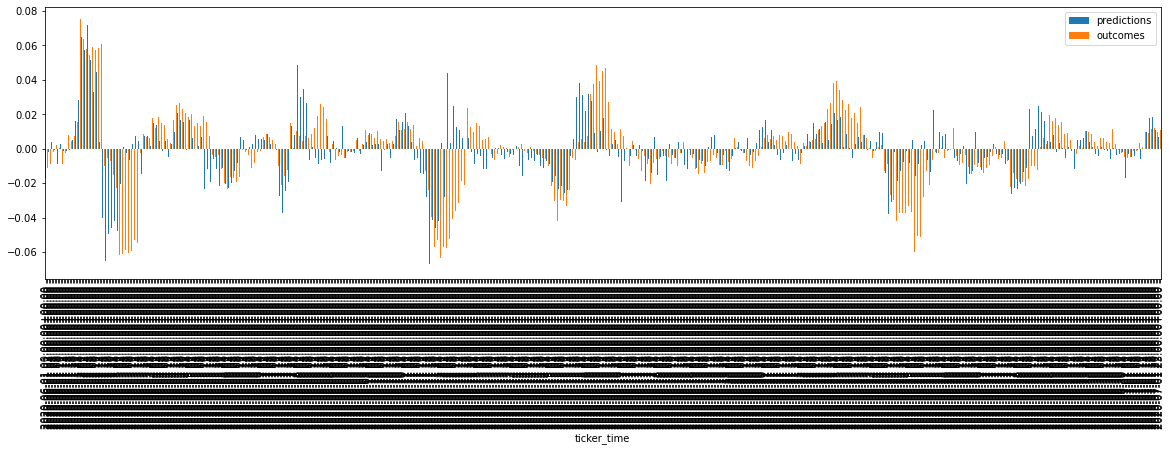

In [13]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


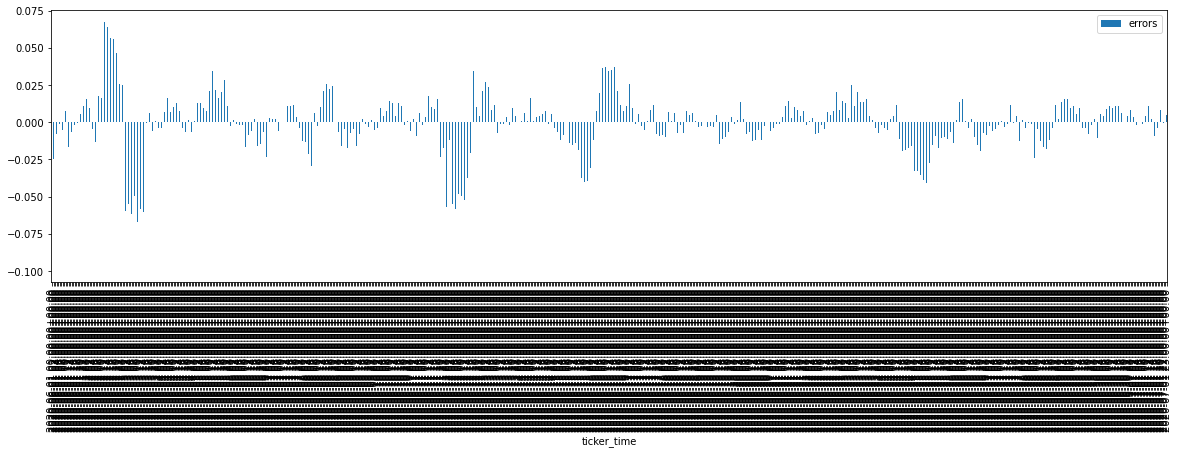

In [14]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


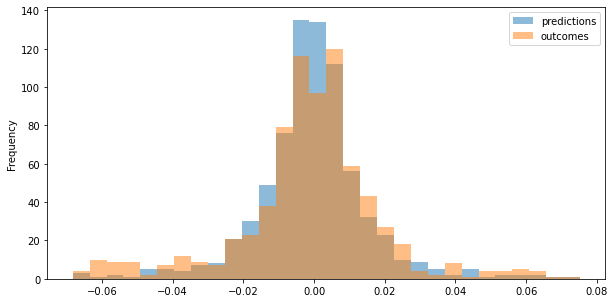

In [15]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


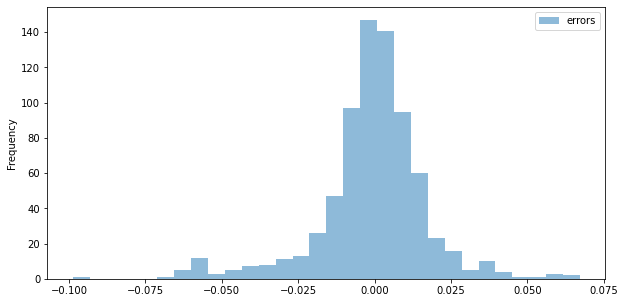

In [16]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


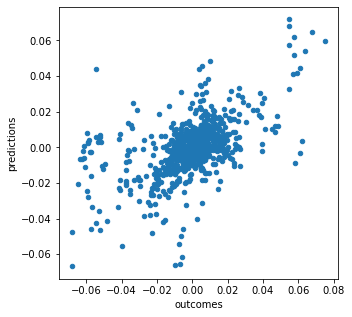

In [17]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [32]:
features = model.feature_importance.feature_importance
features[0:30]


,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close1,0.30463,1.0,1.000000
1,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_high6,0.06002,2.0,0.944444
2,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low6,0.05763,3.0,0.888889
3,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low1,0.05286,4.0,0.833333
4,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low2,0.04559,5.0,0.777778
5,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_high5,0.04491,6.0,0.722222
6,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low5,0.04481,7.0,0.666667
7,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low3,0.04133,8.0,0.611111
8,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_high1,0.03966,9.0,0.555556
9,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close6,0.03827,10.0,0.500000


<br>

### Least import features

In [33]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
16,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close2,0.03202,17.0,0.111111
17,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close4,0.03145,18.0,0.055556


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
